# Introduction to Python3: Pandas

Pandas es un paquete de Python que permite optimizar el uso de datos. Las siguientes notas fueron tomadas del tutorial *Python for Data Analysis-Pandas Lightning Tutorials, Alfred Essa* perteneciente a la serie *Pandas cookbook*.

Para estos notebooks se utilizó Pandas en la versión 0.20.2 en la cual se notan algunas diferencias con la versión 0.17.

## Serie de datos

Para comenzar a trabajar en la exploración y análisis de datos con Pandas se requiere crear una **serie de datos**. Una serie de datos es un objeto que consiste de un conjunto de elementos del mismo o diferente tipo. Este objeto puede ser una lista, un array, o un diccionario.

In [1]:
# importar pandas y nuympy
import pandas as pd 
import numpy as np

Una vez importados los paquetes *pandas* y *numpy* utilizamos la función `Series()` del paquete Pandas para crear una serie de datos. `Series()` es el método básico para crear una Serie de datos:

`a = Series(data, index=index)`

**Ejemplo1:** Serie de datos con índices por default

In [94]:
# Serie de datos con base en un lista de 
# enteros
s1 = pd.Series([33, 19, 89, 11, 5, 9])


In [95]:
# Si no se especifica un índice en el conjunto de datos
# el constructor del objeto Series crea un índice por
# default como una lista consecutiva enteros
s1

0    33
1    19
2    89
3    11
4     5
5     9
dtype: int64

In [96]:
# tipo de dato del objeto Series de pandas
type(s1)

pandas.core.series.Series

In [98]:
# recupera los valores de la serie
s1.values

array([33, 19, 89, 11,  5,  9], dtype=int64)

In [99]:
# tipo de dato que contiene los valores de la serie
type(s1.values)

numpy.ndarray

In [100]:
# recupera los indices del array
s1.index

RangeIndex(start=0, stop=6, step=1)

In [101]:
# asocia una serie como un mapeo de indices a valores
s1

0    33
1    19
2    89
3    11
4     5
5     9
dtype: int64

**Ejemplo2:** Serie con índices que tienen significado específico

In [102]:
# Se definen la serie de datos e índices
data1 =[33, 19, 15, 89, 11, 5, 9]
index1 = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri','Sat','Sun']

In [103]:
# Se crean las series
s2 = pd.Series(data1, index = index1)

In [104]:
s2

Mon    33
Tue    19
Wed    15
Thu    89
Fri    11
Sat     5
Sun     9
dtype: int64

In [105]:
# verifica el índice
s2.index

Index(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'], dtype='object')

In [106]:
# asigna etiquetas a la serie de datos y al índice.
s2.name = 'Daily Temperature'
s2.index.name = 'Weekday'

In [107]:
s2

Weekday
Mon    33
Tue    19
Wed    15
Thu    89
Fri    11
Sat     5
Sun     9
Name: Daily Temperature, dtype: int64

Los valores en una serie de datos son homogéneos. Python modifica los valores de una serie con distintos tipos al tipo de mayor capacidad 

In [108]:
# serie con datos no homogéneos
data2 = [33, 19.3, 15, 89, 11, -5, 9]

In [109]:
s3 = pd.Series(data2, index = index1)

In [110]:
# los datos son de tipo float
s3

Mon    33.0
Tue    19.3
Wed    15.0
Thu    89.0
Fri    11.0
Sat    -5.0
Sun     9.0
dtype: float64

**Ejemplo 3:** Series a partir de diccionarios

In [122]:
dict1 = {'Mon': 33, 'Tue': 19, 'Wed': 15, 'Thu': 89, 'Fri': 11, 'Sat': 5, 'Sun': 9}

In [123]:
s4 = pd.Series(dict1)

In [124]:
s4

Mon    33
Tue    19
Wed    15
Thu    89
Fri    11
Sat     5
Sun     9
dtype: int64

La representación más general de una serie de datos es arreglo ordenado de duplas llave-valor.
* El orden está representado por un offset
* La dupla llave-valor es un mapeo que asocia un índice o etiquea a un valor del arreglo de datos
* Índice como "offset" o "posición" vs índice como "etiqueta" o "llave" 

**Series como ndarray de numpy**

In [125]:
# operaciones vectorizadas
s4

Mon    33
Tue    19
Wed    15
Thu    89
Fri    11
Sat     5
Sun     9
dtype: int64

In [126]:
s4 * 2

Mon     66
Tue     38
Wed     30
Thu    178
Fri     22
Sat     10
Sun     18
dtype: int64

In [127]:
np.log(s4)

Mon    3.496508
Tue    2.944439
Wed    2.708050
Thu    4.488636
Fri    2.397895
Sat    1.609438
Sun    2.197225
dtype: float64

**Nota**: NaN (not a number) es el marcador por default que asigna pandas a un dato faltante 

In [141]:
# slice usando las etiquetas del índice
s4['Tue':'Wed']

Tue    199
Wed     15
dtype: int64

In [129]:
# slice usando posición
s4[1:3]

Tue    19
Wed    15
dtype: int64

In [130]:
# recupera valores usando el offset
s4[1]

19

In [131]:
# asignación de valores
s4[1] = 199

In [132]:
s4

Mon     33
Tue    199
Wed     15
Thu     89
Fri     11
Sat      5
Sun      9
dtype: int64

El objeto serie es una subclase de ndarray de numpy, por tanto dicho objeto tiene la mayoría de los métodos del ndarray.

In [133]:
s4

Mon     33
Tue    199
Wed     15
Thu     89
Fri     11
Sat      5
Sun      9
dtype: int64

In [134]:
# la mediana de la serie de valores
s4.median() 

15.0

In [135]:
# máximo valor de la serie
s4.max()

199

In [136]:
# suma acumulada
s4.cumsum()

Mon     33
Tue    232
Wed    247
Thu    336
Fri    347
Sat    352
Sun    361
dtype: int64

El objeto serie no es iterable pero puede hacerse iterable por medio del la función `enumerate()` que devuelve un objeto iterable que contiene índice y valor.

In [137]:
# itera sobre los valores de la serie
# usando enumerate() devuelve un objeto iterable
for i,v in enumerate(s4):
    print (i, v)

0 33
1 199
2 15
3 89
4 11
5 5
6 9


In [138]:
# comprensión de listas puede usarse para crear una nueva lista
new_list = [x**2 for x in s4]
new_list

[1089, 39601, 225, 7921, 121, 25, 81]

Las objeto serie funciona como un diccionario 

In [139]:
# la llave se encuentra en la lista
'Sun' in s4

True

In [140]:
s4['Tue']

199

In [35]:
# recupera un vloar usando llave o índice
s4['Wed']

15

In [36]:
# asiganación por medio de la llave
s4['Tue'] = 200

In [37]:
s4

Mon     33
Tue    200
Wed     15
Thu     89
Fri     11
Sat      5
Sun      9
dtype: int64

Otra forma de hacer iterable una serie es por medio del método `iteritems()`

In [38]:
# itera sobre el diccionario por medio de llave y valores
for k,v in s4.iteritems():
    print (k,v)

Mon 33
Tue 200
Wed 15
Thu 89
Fri 11
Sat 5
Sun 9


## DataFrames

Pandas permite crear el objeto **DataFrame** que es un arreglo bidimensional con renglones y columnas etiquetadas y indexadas.
* Los datos del array pueden ser de tipo: entero, cadena, números de punto flotante, objetos de Python, etc.
* Los datos contenidos en cada columna son homogéneos
* Por default Pandas crea un índice numérico para los renglones en la sequencia 0,...,n

![](./dataFrame)

Adicionalmente, cualquier columna puede utilizarse como índice de los datos.

In [1]:
import pandas as pd
import datetime

In [2]:
# crea un lista que contiene fechas 01/12 al 07/12
#datetime.datetime Una combinacion de datos y tiempo.Attributes: year, month, day, hour, minute, second, microsecond, and tzinfo.
#datetime.timedelta A duration expressing the difference between two date, time, or datetime instances to microsecond resolution.

dt = datetime.datetime(2013,12,1)
end = datetime.datetime(2013,12,8)
step = datetime.timedelta(days=1)
dates = []

In [3]:
# popule the list
while dt < end:
    dates.append(dt.strftime('%m-%d'))
    dt += step

In [4]:
dates

['12-01', '12-02', '12-03', '12-04', '12-05', '12-06', '12-07']

In [5]:
d = {'Date': dates, 'Tokyo':[15, 19, 15, 11, 9, 8, 13], 
     'Paris': [-2, 0, 2, 5, 7, -5, -3], 
     'Mumbai': [20, 18, 23, 19, 25, 27, 23]}

In [6]:
d

{'Date': ['12-01', '12-02', '12-03', '12-04', '12-05', '12-06', '12-07'],
 'Tokyo': [15, 19, 15, 11, 9, 8, 13],
 'Paris': [-2, 0, 2, 5, 7, -5, -3],
 'Mumbai': [20, 18, 23, 19, 25, 27, 23]}

**Ejemplo 4:** Crear un objeto DataFrame desde un Diccionario de Python con listas de igual longitud

In [7]:
temps = pd.DataFrame(d)
temps

,Date,Tokyo,Paris,Mumbai
0,12-01,15,-2,20
1,12-02,19,0,18
2,12-03,15,2,23
3,12-04,11,5,19
4,12-05,9,7,25
5,12-06,8,-5,27
6,12-07,13,-3,23


In [8]:
temps.Mumbai

0    20
1    18
2    23
3    19
4    25
5    27
6    23
Name: Mumbai, dtype: int64

In [9]:
temps['Mumbai']

0    20
1    18
2    23
3    19
4    25
5    27
6    23
Name: Mumbai, dtype: int64

In [10]:
type(temps['Mumbai'])

pandas.core.series.Series

In [11]:
ntemp = temps['Mumbai']

In [12]:
ntemp

0    20
1    18
2    23
3    19
4    25
5    27
6    23
Name: Mumbai, dtype: int64

In [13]:
temps

,Date,Tokyo,Paris,Mumbai
0,12-01,15,-2,20
1,12-02,19,0,18
2,12-03,15,2,23
3,12-04,11,5,19
4,12-05,9,7,25
5,12-06,8,-5,27
6,12-07,13,-3,23


In [14]:
temps = temps.set_index('Date')
temps

,Tokyo,Paris,Mumbai
Date,,,
12-01,15,-2,20
12-02,19,0,18
12-03,15,2,23
12-04,11,5,19
12-05,9,7,25
12-06,8,-5,27
12-07,13,-3,23


**Ejemplo 5:** Crear un objeto DataFrame con base en un archivo .csv

In [15]:
titanic = pd.read_csv('titanic.csv')

In [16]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [60]:
titanic.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [61]:
titanic.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [62]:
titanic.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [63]:
titanic.Pclass.value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

## Ordenar un DataFrame

In [142]:
# obtener datos de salarios de jugadores de baseball
mlb = pd.read_csv('mlbsalaries.csv')

In [143]:
mlb.head()

,Year,Player,Salary,Position,Team
0,1988,Mike Witt,1400000,Pitcher,Los Angeles Angels
1,1988,George Hendrick,989333,Outfielder,Los Angeles Angels
2,1988,Chili Davis,950000,Outfielder,Los Angeles Angels
3,1988,Brian Downing,900000,Designated Hitter,Los Angeles Angels
4,1988,Bob Boone,883000,Catcher,Los Angeles Angels


In [144]:
mlb.tail()

,Year,Player,Salary,Position,Team
19538,2011,Gustavo Molina,455000,Catcher,New York Yankees
19539,2011,Ivan Nova,432900,Pitcher,New York Yankees
19540,2011,Colin Curtis,420400,Outfielder,New York Yankees
19541,2011,Eduardo Nunez,419300,Shortstop,New York Yankees
19542,2011,Reegie Corona,414000,Second Baseman,New York Yankees


In [145]:
mlb.Year.value_counts()

1990    972
1999    919
2008    858
2001    857
2002    849
2007    848
1998    846
2011    843
2000    843
2004    833
2005    831
2010    828
2003    826
2006    823
2009    818
1995    805
1993    786
1997    773
1996    768
1992    753
1994    748
1991    720
1989    710
1988    686
Name: Year, dtype: int64

In [146]:
mlb.Team.value_counts()

Texas Rangers            711
Los Angeles Dodgers      698
Philadelphia Phillies    695
Los Angeles Angels       695
St. Louis Cardinals      693
Cleveland Indians        693
Boston Red Sox           692
Milwaukee Brewers        690
Washington Nationals     687
New York Yankees         685
Seattle Mariners         684
Baltimore Orioles        684
Toronto Blue Jays        683
Atlanta Braves           683
Cincinnati Reds          681
San Francisco Giants     678
Detroit Tigers           676
New York Mets            676
Kansas City Royals       674
Oakland Athletics        674
San Diego Padres         673
Pittsburgh Pirates       669
Chicago Cubs             663
Houston Astros           660
Minnesota Twins          650
Chicago White Sox        648
Florida Marlins          533
Colorado Rockies         528
Tampa Bay Rays           398
Arizona Diamondbacks     389
Name: Team, dtype: int64

In [147]:
mlb.Position.value_counts()

Pitcher              9160
Outfielder           3785
Catcher              1664
Shortstop            1331
Second Baseman       1216
Third Baseman        1139
First Baseman        1118
Designated Hitter     109
Infielder              21
Name: Position, dtype: int64

Crea un subconjunto de **mlb** para el año 2010

In [148]:
# identifica los jugadores del 2010
mlb.Year == 2010

0        False
1        False
2        False
3        False
4        False
         ...  
19538    False
19539    False
19540    False
19541    False
19542    False
Name: Year, Length: 19543, dtype: bool

In [149]:
# usa el criterio para extraer solo los jugadores del 2010
yr2010 = mlb[mlb.Year == 2010]

In [150]:
yr2010

,Year,Player,Salary,Position,Team
17872,2010,Torii Hunter,18500000,Outfielder,Los Angeles Angels
17873,2010,Bobby Abreu,9000000,Outfielder,Los Angeles Angels
17874,2010,Brian Fuentes,9000000,Pitcher,Los Angeles Angels
17875,2010,Scott Kazmir,8000000,Pitcher,Los Angeles Angels
17876,2010,Joel Pineiro,8000000,Pitcher,Los Angeles Angels
...,...,...,...,...,...
18695,2010,Phil Hughes,447000,Pitcher,New York Yankees
18696,2010,Alfredo Aceves,435650,Pitcher,New York Yankees
18697,2010,David Robertson,426650,Pitcher,New York Yankees
18698,2010,Ramiro Pena,412100,Infielder,New York Yankees


In [151]:
# crea un índice alfanumérico con base en "player"
yr2010 = yr2010.set_index('Player')

In [152]:
yr2010.head()

,Year,Salary,Position,Team
Player,,,,
Torii Hunter,2010,18500000,Outfielder,Los Angeles Angels
Bobby Abreu,2010,9000000,Outfielder,Los Angeles Angels
Brian Fuentes,2010,9000000,Pitcher,Los Angeles Angels
Scott Kazmir,2010,8000000,Pitcher,Los Angeles Angels
Joel Pineiro,2010,8000000,Pitcher,Los Angeles Angels


## Operaciones de ordenamiento

In [153]:
# ordenar por etiquetas de renglón
yr2010.sort_index().head()

,Year,Salary,Position,Team
Player,,,,
A.J. Burnett,2010,16500000,Pitcher,New York Yankees
A.J. Pierzynski,2010,6750000,Catcher,Chicago White Sox
Aaron Cook,2010,9625000,Pitcher,Colorado Rockies
Aaron Harang,2010,12500000,Pitcher,Cincinnati Reds
Aaron Heilman,2010,2150000,Pitcher,Arizona Diamondbacks


In [154]:
# ordenar por etiqueta de columnas
yr2010.sort_index(axis = 1).head()

,Position,Salary,Team,Year
Player,,,,
Torii Hunter,Outfielder,18500000,Los Angeles Angels,2010
Bobby Abreu,Outfielder,9000000,Los Angeles Angels,2010
Brian Fuentes,Pitcher,9000000,Los Angeles Angels,2010
Scott Kazmir,Pitcher,8000000,Los Angeles Angels,2010
Joel Pineiro,Pitcher,8000000,Los Angeles Angels,2010


In [155]:
# ordenar por valores de columna usando "order field"
yr2010.Salary.sort_values(ascending=False).head()

Player
Alex Rodriguez    33000000
CC Sabathia       24285714
Derek Jeter       22600000
Mark Teixeira     20625000
Johan Santana     20144707
Name: Salary, dtype: int64

In [156]:
# Ordenar los valores de columnas usando el método
# sort_values()

yr2010.sort_values('Salary', ascending=False).head()

,Year,Salary,Position,Team
Player,,,,
Alex Rodriguez,2010,33000000,Third Baseman,New York Yankees
CC Sabathia,2010,24285714,Pitcher,New York Yankees
Derek Jeter,2010,22600000,Shortstop,New York Yankees
Mark Teixeira,2010,20625000,First Baseman,New York Yankees
Johan Santana,2010,20144707,Pitcher,New York Mets


In [157]:
# ordenar los valores de varias columnas
yr2010.sort_values(['Salary', 'Team'], 
                   ascending=[False,True]).head(10)

,Year,Salary,Position,Team
Player,,,,
Alex Rodriguez,2010,33000000,Third Baseman,New York Yankees
CC Sabathia,2010,24285714,Pitcher,New York Yankees
Derek Jeter,2010,22600000,Shortstop,New York Yankees
Mark Teixeira,2010,20625000,First Baseman,New York Yankees
Johan Santana,2010,20144707,Pitcher,New York Mets
Miguel Cabrera,2010,20000000,First Baseman,Detroit Tigers
Carlos Beltran,2010,19401569,Outfielder,New York Mets
Alfonso Soriano,2010,19000000,Outfielder,Chicago Cubs
Carlos Lee,2010,19000000,Outfielder,Houston Astros


In [158]:
# top 10 de salarios 
top10 = yr2010.Salary.sort_values(ascending=False).head(10)

In [159]:
type(top10)

pandas.core.series.Series

In [160]:
top10

Player
Alex Rodriguez     33000000
CC Sabathia        24285714
Derek Jeter        22600000
Mark Teixeira      20625000
Johan Santana      20144707
Miguel Cabrera     20000000
Carlos Beltran     19401569
Carlos Lee         19000000
Ryan Howard        19000000
Alfonso Soriano    19000000
Name: Salary, dtype: int64

**Pylab** combines pyplot with numpy into a single namespace. This is convenient for interactive work, but for programming it is recommended that the namespaces be kept separate

Populating the interactive namespace from numpy and matplotlib


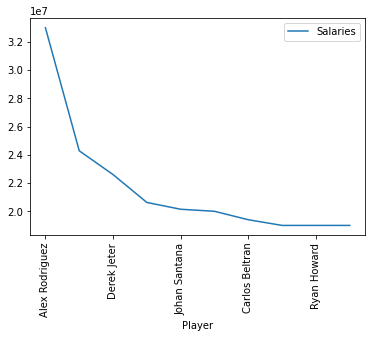

In [161]:
# plot top 10 Salaries
%pylab inline
import matplotlib.pyplot as plt
plt.figure()
top10.plot(label='Salaries')
plt.xticks(rotation='vertical')
plt.legend()
plt.show()

## Grupby

Una vez que se tiene un conjunto de datos se desea ordenar y agrupar los datos de acuerdo a cierta característica. La operación groupby() consiste de tres pasos: separar, analizar y combinar

In [162]:
mlb.head()

,Year,Player,Salary,Position,Team
0,1988,Mike Witt,1400000,Pitcher,Los Angeles Angels
1,1988,George Hendrick,989333,Outfielder,Los Angeles Angels
2,1988,Chili Davis,950000,Outfielder,Los Angeles Angels
3,1988,Brian Downing,900000,Designated Hitter,Los Angeles Angels
4,1988,Bob Boone,883000,Catcher,Los Angeles Angels


In [163]:
grouped = mlb.groupby('Year')
type(grouped)

pandas.core.groupby.generic.DataFrameGroupBy

El objeto agrupado resultado de aplicar `groupby()` es un objeto iterable

In [85]:
for k,group in grouped:
    print (k)
    print (group)

1988
     Year           Player   Salary           Position                Team
0    1988        Mike Witt  1400000            Pitcher  Los Angeles Angels
1    1988  George Hendrick   989333         Outfielder  Los Angeles Angels
2    1988      Chili Davis   950000         Outfielder  Los Angeles Angels
3    1988    Brian Downing   900000  Designated Hitter  Los Angeles Angels
4    1988        Bob Boone   883000            Catcher  Los Angeles Angels
..    ...              ...      ...                ...                 ...
681  1988    Dale Mohorcic   157500            Pitcher    New York Yankees
682  1988    Steve Shields   110000            Pitcher    New York Yankees
683  1988     Joel Skinner   110000            Catcher    New York Yankees
684  1988    Roberto Kelly    67000         Outfielder    New York Yankees
685  1988        Al Leiter    67000            Pitcher    New York Yankees

[686 rows x 5 columns]
1989
      Year           Player   Salary    Position                Te

In [86]:
# utiliza un generador que de forma similar 
# la comprehensión de listas, permite obtener el
# pago mas alto por año
t = (group.sort_values(by='Salary', ascending=False)[:1] for yr,group in grouped)
type(t)

generator

In [87]:
# convierte el objeto generador en un DataFrame
topsalaries = pd.DataFrame()
for line in t:
    topsalaries = topsalaries.append(line)

In [88]:
topsalaries

,Year,Player,Salary,Position,Team
321,1988,Gary Carter,2360714,Catcher,New York Mets
908,1989,Orel Hershiser,2766666,Pitcher,Los Angeles Dodgers
1580,1990,Robin Yount,3200000,Outfielder,Milwaukee Brewers
2590,1991,Darryl Strawberry,3800000,Outfielder,Los Angeles Dodgers
3441,1992,Bobby Bonilla,6100000,Outfielder,New York Mets
4214,1993,Bobby Bonilla,6200000,Outfielder,New York Mets
4977,1994,Bobby Bonilla,6300000,Third Baseman,New York Mets
6068,1995,Cecil Fielder,9237500,First Baseman,Detroit Tigers
6840,1996,Cecil Fielder,9237500,First Baseman,Detroit Tigers
7666,1997,Albert Belle,10000000,Outfielder,Chicago White Sox


In [89]:
ts = topsalaries[['Year', 'Salary']]
ts

,Year,Salary
321,1988,2360714
908,1989,2766666
1580,1990,3200000
2590,1991,3800000
3441,1992,6100000
4214,1993,6200000
4977,1994,6300000
6068,1995,9237500
6840,1996,9237500
7666,1997,10000000


In [90]:
ts = ts.set_index('Year')
ts.head()

,Salary
Year,
1988,2360714
1989,2766666
1990,3200000
1991,3800000
1992,6100000


<AxesSubplot:xlabel='Year'>

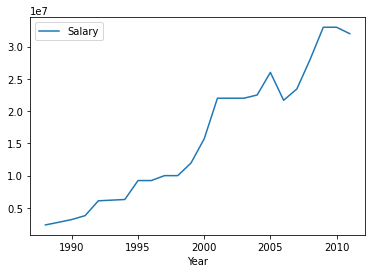

In [91]:
ts.plot()

<AxesSubplot:xlabel='Year'>

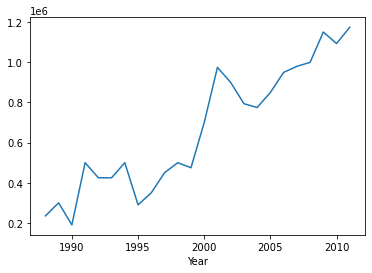

In [92]:
grouped['Salary'].median().plot()